<a href="https://colab.research.google.com/github/anoopaiml/AppliedAI/blob/master/Assignment_4_Instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

# del X_train,X_test

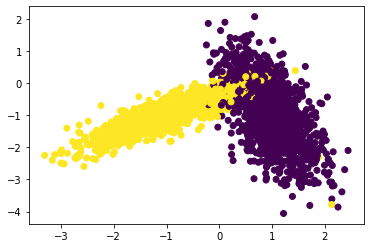

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [0]:
def RandomSearchCV(x_train,y_train,classifier, params, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
   # params=np.random.uniform(param_range[0],param_range[1],10)
   # print(params)
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
    #group 1: 0-33, group 2:34-66, group 3: 67-100
    train_range=int(len(x_train)/folds)
    print(train_range)
    group1 = list(range(0,train_range))
    #print(group1)
    group2= list(range(train_range,2*train_range))
    #print("group2",group2)
    group3= list(range(2*train_range,3*train_range))
    #print("group3",group3)
    '''#3.for each hyperparameter that we generated in step 1:
    # and using the above groups we have created in step 2 you will do cross-validation as follows

        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies

        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies

        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure

        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"'''
    trainscores = []
    testscores  = []
    for k in tqdm(params):

        trainscores_folds = []
        testscores_folds  = [] 
        for j in range(0,folds):
            group12= group1 + group2
            group13 = group1 + group3
            group23 = group2 + group3 
            # selecting the data points based on the train_indices and test_indices
            X_train = x_train[group12]
            Y_train = y_train[group12]
            X_test  = x_train[group3]
            Y_test  = y_train[group3]
            k1=int(k)
            classifier.n_neighbors = k1
            print(k)
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
            X_train = x_train[group13]
            Y_train = y_train[group13]
            X_test  = x_train[group2]
            Y_test  = y_train[group2]
            classifier.n_neighbors = k1
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
            X_train = x_train[group23]
            Y_train = y_train[group23]
            X_test  = x_train[group1]
            Y_test  = y_train[group1]
            print("X len",len(X_train))
            print("Y len",len(Y_train))
            classifier.n_neighbors = k1
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))

        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    #  print("aaa")
    print(trainscores)
    print(testscores)
    return trainscores,testscores
    

  0%|          | 0/10 [00:00<?, ?it/s]

2500
33.70764803865238
X len 5000
Y len 5000
33.70764803865238
X len 5000
Y len 5000
33.70764803865238
X len 5000
Y len 5000


 10%|█         | 1/10 [00:02<00:21,  2.38s/it]

44.0584450750668
X len 5000
Y len 5000
44.0584450750668
X len 5000
Y len 5000
44.0584450750668
X len 5000
Y len 5000


 20%|██        | 2/10 [00:04<00:19,  2.40s/it]

26.781378818150483
X len 5000
Y len 5000
26.781378818150483
X len 5000
Y len 5000
26.781378818150483
X len 5000
Y len 5000


 30%|███       | 3/10 [00:07<00:16,  2.35s/it]

19.609312819060747
X len 5000
Y len 5000
19.609312819060747
X len 5000
Y len 5000
19.609312819060747
X len 5000
Y len 5000


 40%|████      | 4/10 [00:09<00:13,  2.29s/it]

8.826759684585578
X len 5000
Y len 5000
8.826759684585578
X len 5000
Y len 5000
8.826759684585578
X len 5000
Y len 5000


 50%|█████     | 5/10 [00:11<00:11,  2.20s/it]

24.10014896635613
X len 5000
Y len 5000
24.10014896635613
X len 5000
Y len 5000
24.10014896635613
X len 5000
Y len 5000


 60%|██████    | 6/10 [00:13<00:08,  2.20s/it]

29.23997216146699
X len 5000
Y len 5000
29.23997216146699
X len 5000
Y len 5000
29.23997216146699
X len 5000
Y len 5000


 70%|███████   | 7/10 [00:15<00:06,  2.21s/it]

46.02886937225653
X len 5000
Y len 5000
46.02886937225653
X len 5000
Y len 5000
46.02886937225653
X len 5000
Y len 5000


 80%|████████  | 8/10 [00:18<00:04,  2.31s/it]

16.87733080858245
X len 5000
Y len 5000
16.87733080858245
X len 5000
Y len 5000
16.87733080858245
X len 5000
Y len 5000


 90%|█████████ | 9/10 [00:20<00:02,  2.27s/it]

1.4957069767062634
X len 5000
Y len 5000
1.4957069767062634
X len 5000
Y len 5000
1.4957069767062634


100%|██████████| 10/10 [00:22<00:00,  2.13s/it]

X len 5000
Y len 5000
[0.9576000000000001, 0.9584, 0.9574, 0.9571333333333334, 0.9604666666666666, 0.9568, 0.9578000000000001, 0.9579333333333333, 0.9579333333333333, 1.0]
[0.9557333333333333, 0.9562666666666667, 0.9546666666666668, 0.9541333333333333, 0.9524, 0.9536, 0.9550666666666667, 0.9561333333333333, 0.9548, 0.9296000000000001]
[0.9576000000000001, 0.9584, 0.9574, 0.9571333333333334, 0.9604666666666666, 0.9568, 0.9578000000000001, 0.9579333333333333, 0.9579333333333333, 1.0]


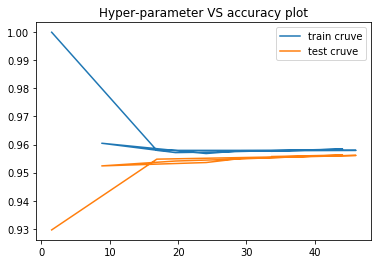

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")


neigh = KNeighborsClassifier()
param_range=(1,50)
params=np.random.uniform(param_range[0],param_range[1],10)
folds=3
#params1 = {'n_neighbors':params}
trainscores,testscores = RandomSearchCV(X_train,y_train,neigh, params, folds)
print(trainscores)
plt.plot(params,trainscores, label='train cruve')
plt.plot(params,testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [0]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

In [0]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 21)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)